<a href="https://colab.research.google.com/github/Vasu456/ClusterView-/blob/main/Copy_of_Cluster_View.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Modules



In [ ]:
!pip install umap-learn

In [4]:
!pip install networkx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install forcelayout
!pip install pyDRMetrics

In [6]:
!pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
import requests
import tarfile
  

# Download and extract the file
url = "https://src.fedoraproject.org/lookaside/pkgs/metis/metis-5.1.0.tar.gz/5465e67079419a69e0116de24fce58fe//metis-5.1.0.tar.gz"
response = requests.get(url, stream=True)
file = tarfile.open(fileobj=response.raw, mode="r|gz")
file.extractall(path=".")

# Change working directory
%cd metis-5.1.0

!make config shared=1 prefix=~/.local/
!make install
!cp ~/.local/lib/libmetis.so /usr/lib/libmetis.so
!export METIS_DLL=/usr/lib/libmetis.so
!pip3 install metis-python

import metispy as metis

In [8]:
import numpy as np
from keras.datasets import mnist
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import forcelayout as fl
from sklearn.preprocessing import MinMaxScaler
from scipy import spatial

In [9]:
import umap.distances as distances
import umap.umap_ as umap
import networkx as nkx

from pyDRMetrics.pyDRMetrics import *

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
files=['bank.csv','cifar.csv','cnae.csv','coil20.csv','epileptic.csv','fashion_mnist.csv','fmd.csv','har.csv','hatespeech.csv','hiva.csv','imdb.csv','orl.csv','secom.csv','seismic.csv','sentiment.csv','sms.csv','spambase.csv','svhn.csv']

In [12]:
i=0

In [13]:
dataset_path = '/content/drive/MyDrive/input_data/'+files[i] 
data_ = pd.read_csv(dataset_path)

In [14]:
params = [{'angular_rp_forest': False, 'init': 'random', 'metric': 'euclidean', 'min_dist': 0.01, 'n_components': 2, 'n_neighbors': 5, 'random_state': 42, 'spread': 1.0},
{'angular_rp_forest': False, 'init': 'spectral', 'metric': 'euclidean', 'min_dist': 0.001, 'n_components': 2, 'n_neighbors': 15, 'random_state': 42, 'spread': 1.0},
{'angular_rp_forest': False, 'init': 'spectral', 'metric': 'euclidean', 'min_dist': 0.01, 'n_components': 2, 'n_neighbors': 10, 'random_state': 42, 'spread': 1.0},
{'angular_rp_forest': False, 'init': 'spectral', 'metric': 'euclidean', 'min_dist': 0.001, 'n_components': 2, 'n_neighbors': 5, 'random_state': 42, 'spread': 1.0},
{'angular_rp_forest': False, 'init': 'spectral', 'metric': 'euclidean', 'min_dist': 0.001, 'n_components': 2, 'n_neighbors': 5, 'random_state': 42, 'spread': 1.0},
{'angular_rp_forest': False, 'init': 'spectral', 'metric': 'euclidean', 'min_dist': 0.5, 'n_components': 2, 'n_neighbors': 5, 'random_state': 42, 'spread': 1.0},
{'angular_rp_forest': False, 'init': 'spectral', 'metric': 'euclidean', 'min_dist': 0.5, 'n_components': 2, 'n_neighbors': 15, 'random_state': 42, 'spread': 1.0},
{'angular_rp_forest': False, 'init': 'random', 'metric': 'euclidean', 'min_dist': 0.001, 'n_components': 2, 'n_neighbors': 5, 'random_state': 42, 'spread': 1.0},
{'angular_rp_forest': False, 'init': 'spectral', 'metric': 'euclidean', 'min_dist': 0.1, 'n_components': 2, 'n_neighbors': 15, 'random_state': 42, 'spread': 1.0},
{'angular_rp_forest': False, 'init': 'spectral', 'metric': 'euclidean', 'min_dist': 0.1, 'n_components': 2, 'n_neighbors': 15, 'random_state': 42, 'spread': 1.0},
{'angular_rp_forest': False, 'init': 'spectral', 'metric': 'euclidean', 'min_dist': 0.5, 'n_components': 2, 'n_neighbors': 15, 'random_state': 42, 'spread': 1.0},
{'angular_rp_forest': False, 'init': 'random', 'metric': 'euclidean', 'min_dist': 0.01, 'n_components': 2, 'n_neighbors': 15, 'random_state': 42, 'spread': 1.0},
{'angular_rp_forest': False, 'init': 'spectral', 'metric': 'euclidean', 'min_dist': 0.5, 'n_components': 2, 'n_neighbors': 5, 'random_state': 42, 'spread': 1.0},
{'angular_rp_forest': False, 'init': 'spectral', 'metric': 'euclidean', 'min_dist': 0.001, 'n_components': 2, 'n_neighbors': 5, 'random_state': 42, 'spread': 1.0},
{'angular_rp_forest': False, 'init': 'random', 'metric': 'euclidean', 'min_dist': 0.001, 'n_components': 2, 'n_neighbors': 5, 'random_state': 42, 'spread': 1.0},
{'angular_rp_forest': False, 'init': 'random', 'metric': 'euclidean', 'min_dist': 0.001, 'n_components': 2, 'n_neighbors': 5, 'random_state': 42, 'spread': 1.0},
{'angular_rp_forest': False, 'init': 'random', 'metric': 'euclidean', 'min_dist': 0.5, 'n_components': 2, 'n_neighbors': 10, 'random_state': 42, 'spread': 1.0},
{'angular_rp_forest': False, 'init': 'spectral', 'metric': 'euclidean', 'min_dist': 0.001, 'n_components': 2, 'n_neighbors': 10, 'random_state': 42, 'spread': 1.0}]


In [15]:
classes = [2,5,9,20,4,10,10,6,3,2,2,3,2,2,2,2,2,5]

## Penguins

In [ ]:
penguin_data = pd.read_csv("https://raw.githubusercontent.com/allisonhorst/palmerpenguins/c19a904462482430170bfe2c718775ddb7dbb885/inst/extdata/penguins.csv")

In [ ]:
penguin_data = penguin_data.dropna()
penguin_data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


In [ ]:
data_ = penguin_data[
    [
        "bill_length_mm",
        "bill_depth_mm",
        "flipper_length_mm",
        "body_mass_g",
    ]
].values
data_ = StandardScaler().fit_transform(data_)

In [ ]:
data_.shape

(333, 4)

# Iris

In [ ]:
dataset = pd.read_csv('https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv')

In [ ]:
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
data_ = dataset[
    [
        "sepal_length",
        "sepal_width",
        "petal_length",
        "petal_width",
    ]
].values

In [ ]:
data_.shape

(150, 4)

#Wheat seed Dataset

In [ ]:
dataset = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/wheat-seeds.csv')

In [ ]:
dataset.columns = ['Area', 'Perimeter', 'Compactness', 'KernelLength', 'KernelWidth', 'AsymmetryCoefficient', 'KernelGrooveLength', 'Variety']

In [ ]:
dataset.head()

,Area,Perimeter,Compactness,KernelLength,KernelWidth,AsymmetryCoefficient,KernelGrooveLength,Variety
0,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
1,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
2,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
3,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
4,14.38,14.21,0.8951,5.386,3.312,2.462,4.956,1


In [ ]:
data_ = dataset.iloc[:,:-1].values

In [ ]:
data_.shape

(209, 7)

# Wine

In [ ]:
dataset = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep=';')

In [ ]:
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
data_ = dataset[
    [
        "fixed acidity",
        "volatile acidity",
        "citric acid",
        "residual sugar",
        "chlorides",
        "free sulfur dioxide",
        "total sulfur dioxide",
        "density",
        "pH",
        "sulphates",
        "alcohol"
    ]
].values

In [ ]:
data_.shape

(4898, 11)

#Diabetes Dataset

In [ ]:
dataset = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv')
dataset.columns = ['pregnancies', 'glucose', 'blood_pressure', 'skin_thickness', 'insulin', 'bmi', 'diabetes_pedigree_function', 'age', 'outcome']

NameError: ignored

In [ ]:
dataset.head()

In [ ]:
data_ = dataset.iloc[:,:-1].values

In [ ]:
data_.shape

## MNIST

In [ ]:
(x_train,y_train),(x_test,y_test)  = mnist.load_data()
# data_ = digits.data
data_ = x_train[50000:60000]
data_ = [i.flatten() for i in data_]

In [ ]:
np.array(data_).shape

In [16]:
data_ = StandardScaler().fit_transform(data_)

In [17]:
scaler = MinMaxScaler()
data_ = scaler.fit_transform(data_.astype('float32'))

In [18]:
data_ = np.array(data_)

In [19]:
reducer = umap.UMAP(**params[i])
#reducer = umap.UMAP()
reducer.fit(data_)

UMAP(init='random', min_dist=0.01, n_neighbors=5, random_state=42, tqdm_kwds={'bar_format': '{desc}: {percentage:3.0f}%| {bar} {n_fmt}/{total_fmt} [{elapsed}]', 'desc': 'Epochs completed', 'disable': True})

In [ ]:
#graph = reducer.graph_
#ngraph = nkx.Graph(graph)

In [20]:
graph = reducer.graph_
ngraph = nkx.Graph(graph)

In [21]:
(edgecuts, parts) = metis.part_graph(ngraph, nparts=classes[i])
#(edgecuts, parts) = metis.part_graph(ngraph, nparts=10)

In [22]:
embedding = reducer.embedding_

In [23]:
embedding = reducer.embedding_
embedding_scaled =  scaler.fit_transform(embedding.astype('float32'))

In [48]:
def calculateClusterCenter(data,parts):
  centre={}
  for i in range(len(parts)):
    if parts[i] in centre:
      centre[parts[i]]+=data[i]
    else:
      centre[parts[i]]=data[i]


  for j in centre:
    try:
      centre[j]/=parts.count(j)
    except:
      centre[j]=centre[j]/parts.count(j)
  
  return centre

centre = calculateClusterCenter(data_,parts)


In [49]:
embedding = reducer.embedding_

In [50]:
print(embedding)

[[ 7.279009   8.786418 ]
 [ 5.421264   4.5952168]
 [-1.2364806  8.16062  ]
 ...
 [ 5.9090853 -1.7539309]
 [ 3.282805   2.9156132]
 [ 8.592041   7.480546 ]]


In [51]:
embedding = reducer.embedding_
embedding_scaled =  scaler.fit_transform(embedding.astype('float32'))

In [52]:
def normalize(D):
    scaler = MinMaxScaler()
    D = scaler.fit_transform(D.reshape((-1, 1)))
    D = D.squeeze()
    return D

def normalized_stress(D_high, D_low):
    return (np.sum((D_high - D_low)**2) / np.sum(D_high**2))

In [53]:
def stress1(origData, projData):
  D_low = spatial.distance.pdist(projData, 'euclidean')
  D_high = spatial.distance.pdist(origData, 'euclidean')
  D_low = normalize(D_low)
  D_high = normalize(D_high)
  return normalized_stress(D_high, D_low)

In [54]:
def stress2(origData, projData):
  D_low = spatial.distance.pdist(projData, 'euclidean')
  D_high = spatial.distance.pdist(origData, 'euclidean')
  #D_low = normalize(D_low)
  #D_high = normalize(D_high)
  return normalized_stress(D_high, D_low)

In [55]:
def stress(originalData, projectedData):
  squarePairDistance=0
  numerator=0
  length = len(originalData)
  for i in range(length):
    for j in range(i+1,length):
          original = distances.euclidean(originalData[i],originalData[j])
          projected = distances.euclidean(projectedData[i], projectedData[j])
          squareDifference = (original-projected)**2
          numerator+=squareDifference
          squarePairDistance += original**2

  stress = numerator/squarePairDistance

  return stress

In [56]:
def selectCluster(parts, projectedPoints, cluster):
  clusterPoints=[]
  for i in range(len(parts)):
    if parts[i]==cluster:
      clusterPoints.append(list(projectedPoints[i]))
  return np.array(clusterPoints)

In [57]:
def translate(cluster,axis, distance):
  toAdd = [0,0]
  toAdd[axis] = distance
  return cluster+toAdd

In [58]:
def changeCluster(parts, coordinates, projected, cluster):
  count=0
  newProjected=[]
  for i in range(len(parts)):
    if parts[i]==cluster:
      newProjected.append(coordinates[count])
      count+=1
    else:
      newProjected.append(projected[i])
  return newProjected

In [59]:
def forceDirectedCentres(originalCentres, parts):
  clusterCentres = np.array(originalCentres[0])
  for i in range(1,len(set(parts))):
    clusterCentres=np.vstack((clusterCentres, originalCentres[i]))

  layout = fl.draw_spring_layout(dataset=clusterCentres, algorithm=fl.SpringForce)

  print(layout.get_stress())

  forceDirectedPositions = layout.get_positions()

  return forceDirectedPositions

In [60]:
def PCACentres(originalCentres, parts):
  clusterCentres = np.array(originalCentres[0])
  for i in range(1,len(set(parts))):
    clusterCentres=np.vstack((clusterCentres, originalCentres[i]))

  pcaCoords = PCA(n_components=2).fit_transform(clusterCentres)

  return pcaCoords

In [61]:
def posDifference(highDimensionCentres, lowDimensionCentres, initializer):
  if initializer=="fdl":
    centreRepresentation = forceDirectedCentres(highDimensionCentres, parts)
  elif initializer=="pca":
    centreRepresentation = PCACentres(highDimensionCentres, parts)

  centre2d = np.array(lowDimensionCentres[0])
  for i in range(1,len(set(parts))):
    centre2d=np.vstack((centre2d, lowDimensionCentres[i]))

  return centreRepresentation - centre2d

In [62]:
def translateUsingDifference(difference, parts, embedding):
  newEmbedding = embedding 
  for i in range(len(difference)):
    x = selectCluster(parts, newEmbedding, i)
    translated = translate(x, 0, difference[i][0])
    newEmbedding = changeCluster(parts, translated, newEmbedding, i)

    y = selectCluster(parts, newEmbedding, i)
    translated = translate(y, 1, difference[i][1])
    newEmbedding = changeCluster(parts, translated, newEmbedding, i)

  return newEmbedding

1.5774393774668228e-16


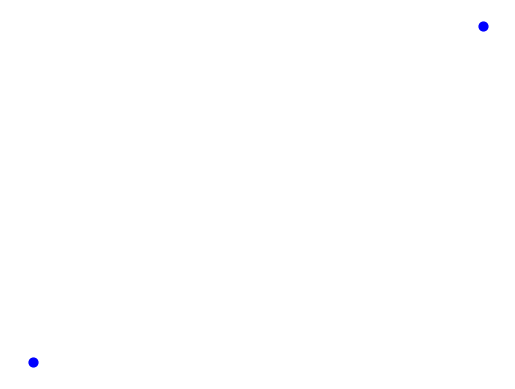

In [63]:
initialCentres = calculateClusterCenter(embedding_scaled,parts)
clusterCentres = np.array(centre.get(i, []))

differenceFDL = posDifference(centre, initialCentres, "fdl")

In [64]:
translatedEmbeddingFDL = translateUsingDifference(differenceFDL, parts, embedding_scaled)
print("Both scaled:" ,stress1(data_, embedding_scaled),',',stress1(data_,translatedEmbeddingFDL))
print("Stress not scaled:", stress2(data_, embedding_scaled),',',stress2(data_,translatedEmbeddingFDL))

Both scaled: 0.23010996786125318 , 0.27906107440942307
Stress not scaled: 0.7375776794521277 , 0.5515109924862928


In [ ]:
'''for i in range(0,5):
  reducer = umap.UMAP(**params[0])
  reducer.fit(data_)
  graph = reducer.graph_
  ngraph = nkx.Graph(graph)
  (edgecuts, parts) = metis.part_graph(ngraph, nparts=classes[0])
  embedding = reducer.embedding_
  embedding_scaled =  scaler.fit_transform(embedding.astype('float32'))
  translatedEmbeddingFDL = translateUsingDifference(differenceFDL, parts, embedding_scaled)
  print("Both scaled:" ,stress1(data_, embedding_scaled),',',stress1(data_,translatedEmbeddingFDL))
  print("Stress not scaled:", stress2(data_, embedding_scaled),',',stress2(data_,translatedEmbeddingFDL))'''

In [ ]:
initialCentres = calculateClusterCenter(embedding,parts)
differenceFDL = posDifference(centre, initialCentres, "fdl")


In [ ]:
translatedEmbeddingFDL = translateUsingDifference(differenceFDL, parts, embedding)
print("Embedding not scaled:", stress1(data_, embedding),',',stress1(data_,translatedEmbeddingFDL))
print("Both not scaled:", stress2(data_, embedding),',',stress2(data_,translatedEmbeddingFDL))

In [42]:
import os
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from scipy import spatial
from scipy import stats

In [43]:
def metric_continuity(k, id_run):
    global N_SAMPLES
    global DISTANCES

    D_high = np.load(DISTANCES['D_high_matrix'], mmap_mode='c')
    D_low = np.load(DISTANCES[id_run]['D_low_matrix'], mmap_mode='c')

    n = N_SAMPLES

    nn_orig = D_high.argsort()
    nn_proj = D_low.argsort()

    knn_orig = nn_orig[:, :k + 1][:, 1:]
    knn_proj = nn_proj[:, :k + 1][:, 1:]

    sum_i = 0

    for i in range(N_SAMPLES):
        V = np.setdiff1d(knn_orig[i], knn_proj[i])

        sum_j = 0
        for j in range(V.shape[0]):
            sum_j += np.where(nn_proj[i] == V[j])[0] - k

        sum_i += sum_j

    return float((1 - (2 / (n * k * (2 * n - 3 * k - 1)) * sum_i)).squeeze())


In [44]:
metric_continuity(7,data_)

NameError: ignored

In [45]:
from pyDRMetrics.coranking_matrix import *
from sklearn.metrics import pairwise_distances

def TandC(X,Z):
  df = pd.DataFrame(X, index=None)
  D = pd.DataFrame(pairwise_distances(df.values)).values
  dfz = pd.DataFrame(Z, index=None)
  Dz = pd.DataFrame(pairwise_distances(dfz.values)).values

  R = ranking_matrix(D)
  Rz = ranking_matrix(Dz)
  Q = coranking_matrix(R, Rz)

  Q = Q[1:,1:]
  m = len(Q)

  # T = np.zeros(m-1) # trustworthiness
  # C = np.zeros(m-1) # continuity

  Qs = Q[7:,:7]
  W = np.arange(Qs.shape[0]).reshape(-1, 1) # a column vector of weights. weight = rank error = actual_rank - k
  T = 1-np.sum(Qs * W)/(7+1)/m/(m-1-7)  # 1 - normalized hard-k-intrusions. lower-left region. weighted by rank error (rank - k)
  Qs = Q[:7,7:]
  W = np.arange(Qs.shape[1]).reshape(1, -1) # a row vector of weights. weight = rank error = actual_rank - k
  C = 1-np.sum(Qs * W)/(7+1)/m/(m-1-7)  # 1 - normalized hard-k-extrusions. upper-right region 

  return (T,C)

In [69]:
drm = TandC(data_, embedding_scaled)
newDrm = TandC(data_, translatedEmbeddingFDL)

In [71]:

print("Trustworthiness of UMAP: ",drm[0])
print("Trustworthiness of Translation FDL: ",newDrm[0])

Trustworthiness of UMAP:  0.9700529758941905
Trustworthiness of Translation FDL:  0.9662268304534357


In [72]:
print("\nContinuity of UMAP: ",drm[1])
print("Continuity of Translation FDL: ",newDrm[1])


Continuity of UMAP:  0.9289523631752352
Continuity of Translation FDL:  0.9292073467017469


In [73]:
import numpy as np
from sklearn.metrics import pairwise_distances

def metric_trustworthiness(k, data_, embedding):
    n = data_.shape[0]

    D_high = pairwise_distances(data_)
    D_low = pairwise_distances(embedding)

    nn_orig = D_high.argsort()
    nn_proj = D_low.argsort()

    knn_orig = nn_orig[:, :k + 1][:, 1:]
    knn_proj = nn_proj[:, :k + 1][:, 1:]

    sum_i = 0

    for i in range(n):
        U = np.setdiff1d(knn_proj[i], knn_orig[i])

        sum_j = 0
        for j in range(U.shape[0]):
            sum_j += np.where(nn_orig[i] == U[j])[0] - k

        sum_i += sum_j

    return float((1 - (2 / (n * k * (2 * n - 3 * k - 1)) * sum_i)).squeeze())


In [74]:
result = metric_trustworthiness(7, data_, embedding)
print(result)

0.9653627245693992


In [75]:
import numpy as np
from sklearn.metrics import pairwise_distances

def metric_continuity(k, data_, embeddings):
    n = data_.shape[0]

    D_high = pairwise_distances(data_)
    D_low = pairwise_distances(embeddings)

    nn_orig = D_high.argsort()
    nn_proj = D_low.argsort()

    knn_orig = nn_orig[:, :k + 1][:, 1:]
    knn_proj = nn_proj[:, :k + 1][:, 1:]

    sum_i = 0

    for i in range(n):
        V = np.setdiff1d(knn_orig[i], knn_proj[i])

        sum_j = 0
        for j in range(V.shape[0]):
            sum_j += np.where(nn_proj[i] == V[j])[0] - k

        sum_i += sum_j

    return float((1 - (2 / (n * k * (2 * n - 3 * k - 1)) * sum_i)).squeeze())


In [76]:
result = metric_continuity(7, data_, embedding)
print(result)


0.9175976521846597


In [77]:
import numpy as np
from sklearn.metrics import pairwise_distances

def compute_tandc(k, data_, embeddings):
    n = data_.shape[0]

    D_high = pairwise_distances(data_)
    D_low = pairwise_distances(embeddings)

    nn_orig = D_high.argsort()
    nn_proj = D_low.argsort()

    knn_orig = nn_orig[:, :k + 1][:, 1:]
    knn_proj = nn_proj[:, :k + 1][:, 1:]

    sum_i_t = 0
    sum_i_c = 0

    for i in range(n):
        V = np.setdiff1d(knn_orig[i], knn_proj[i])
        U = np.setdiff1d(knn_proj[i], knn_orig[i])

        sum_j_t = 0
        for j in range(U.shape[0]):
            sum_j_t += np.where(nn_orig[i] == U[j])[0] - k

        sum_j_c = 0
        for j in range(V.shape[0]):
            sum_j_c += np.where(nn_proj[i] == V[j])[0] - k

        sum_i_t += sum_j_t
        sum_i_c += sum_j_c

    T = float((1 - (2 / (n * k * (2 * n - 3 * k - 1)) * sum_i_t)).squeeze())
    C = float((1 - (2 / (n * k * (2 * n - 3 * k - 1)) * sum_i_c)).squeeze())

    return T, C


In [79]:
trustworthiness, continuity = compute_tandc(7, data_, translatedEmbeddingFDL)
print("Trustworthiness:", trustworthiness)
print("Continuity:", continuity)


Trustworthiness: 0.9610914747645355
Continuity: 0.9187627448418962
